### Loading libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from soccerplots.radar_chart import Radar

### Import data

In [3]:
#Teams and players dataset
teams = pd.read_csv('Real vs Liverpool.csv')
players = pd.read_csv('Players.csv')

### Quick overview and replace of NaN values

In [4]:
teams.head(10)

,Team,Games,Gls,Sh,SoT,SoT%,G/Sh,G/SoT,Dist,FK,...,Fls,Fld,Off,Crs,Int,TklW,Recov,Aerial Won,Aerial Lost,AerialWon%
0,Real,51,109,818,298,36.4,0.12,0.33,18.0,27,...,598,733,125,655,678,540,3290,510,458,52.7
1,vs Real,51,48,617,194,31.4,0.07,0.24,17.5,18,...,767,572,51,623,724,550,3003,458,510,47.3
2,Liverpool,55,137,1007,339,33.7,0.13,0.38,16.2,12,...,626,621,102,908,771,557,4559,761,671,53.1
3,vs Liverpool,55,42,432,154,35.6,0.10,0.27,16.6,15,...,648,610,216,454,1058,641,3726,671,761,46.9


In [5]:
players.head(10)

,Player,Pos,Team,Age,Starts,Min,Gls,Ast,Gls/90,Ast/90,...,PSxG-GA,Saves/90,Save%,PSxG/SoT,PSxG+/-,Crosses Stopped % \r,Def. Actions Outside Pen. Area \r,Avg. Distance of Def. Actions,AvgLen,OPA/90
0,Alisson,GK,Liverpool,29,49,4410,0,1,0.00,0.02,...,0.08,1.75,71.7,0.31,0.05,11.2,1.41,17.0,29.8,1.48
1,Virgil van Dijk,DF,Liverpool,30,47,4260,3,2,0.06,0.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trent Alexander-Arnold,DF,Liverpool,23,42,3749,2,18,0.05,0.43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mohamed Salah,FW,Liverpool,29,42,3744,30,15,0.72,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrew Robertson,DF,Liverpool,28,40,3645,2,14,0.05,0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fabinho,MF,Liverpool,28,38,3484,8,1,0.21,0.03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Sadio Mané,FW,Liverpool,30,41,3447,21,3,0.55,0.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Jordan Henderson,MF,Liverpool,31,39,3413,3,6,0.08,0.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Joël Matip,DF,Liverpool,30,39,3405,1,2,0.03,0.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Diogo Jota,FW,Liverpool,25,36,3188,21,5,0.59,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
players.replace(np.NaN,0, inplace = True)

In [7]:
players.loc[players['Pos'] == 'GK']

,Player,Pos,Team,Age,Starts,Min,Gls,Ast,Gls/90,Ast/90,...,PSxG-GA,Saves/90,Save%,PSxG/SoT,PSxG+/-,Crosses Stopped % \r,Def. Actions Outside Pen. Area \r,Avg. Distance of Def. Actions,AvgLen,OPA/90
0,Alisson,GK,Liverpool,29,49,4410,0,1,0.0,0.02,...,0.08,1.75,71.7,0.31,0.05,11.2,1.41,17.0,29.8,1.48
24,Thibaut Courtois,GK,Real,29,46,4200,0,0,0.0,0.00,...,0.08,2.50,76.2,0.26,0.14,10.3,0.61,14.6,32.6,0.58


In [8]:
players.columns

Index(['Player', 'Pos', 'Team', 'Age', 'Starts', 'Min', 'Gls', 'Ast', 'Gls/90',
       'Ast/90', 'G+A/90', 'xG', 'xA', 'xG+xA', 'npxG', 'npxG+xA', 'Sh/90',
       'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'npxG/Sh', 'G-xG', 'Cmp', 'Att',
       'Cmp%', 'TotDist', 'PrgDist', 'Press', 'Succ', '%', 'Tkl+Int', 'Clr',
       'PSxG', 'PSxG-GA', 'Saves/90', 'Save%', 'PSxG/SoT', 'PSxG+/-',
       'Crosses Stopped % \r', 'Def. Actions Outside Pen. Area \r',
       'Avg. Distance of Def. Actions', 'AvgLen', 'OPA/90'],
      dtype='object')

In [9]:
players.rename(columns = {'Crosses Stopped % \r':'Crosses Stopped %','Def. Actions Outside Pen. Area \r':'Def. Actions Outside Pen. Area'}, inplace = True)

In [10]:
players.nlargest(22, 'Min').sort_values(by = ['Team','Min'],ascending = [True,False])[['Player','Team','Min']]

,Player,Team,Min
0,Alisson,Liverpool,4410
1,Virgil van Dijk,Liverpool,4260
2,Trent Alexander-Arnold,Liverpool,3749
3,Mohamed Salah,Liverpool,3744
4,Andrew Robertson,Liverpool,3645
5,Fabinho,Liverpool,3484
6,Sadio Mané,Liverpool,3447
7,Jordan Henderson,Liverpool,3413
8,Joël Matip,Liverpool,3405
9,Diogo Jota,Liverpool,3188


In [11]:
players.loc[((players['Gls']>15) | (players['Ast']> 8) | (players['xG+xA']> 0.6)) & (players['Min']>1000)][['Player','Team','Gls','Ast','xG+xA']].sort_values(by = 'xG+xA',ascending = False).set_index('Player')

,Team,Gls,Ast,xG+xA
Player,,,,
Karim Benzema,Real,41,12,1.13
Mohamed Salah,Liverpool,30,15,1.00
Diogo Jota,Liverpool,21,5,0.82
Luis Díaz,Liverpool,5,3,0.74
Sadio Mané,Liverpool,21,3,0.71
Roberto Firmino,Liverpool,11,4,0.70
Vinicius Júnior,Real,17,15,0.65
Trent Alexander-Arnold,Liverpool,2,18,0.42
Luka Modrić,Real,2,9,0.28


### Function for comparison of players

In [21]:
def comparePlayers(player1, player2,params):
    ranges = []
    a_values = []
    b_values = []
    
    
    for x in params:
        a = min(players[params][x])
        a = a - (a*.25)
        
        b = max(players[params][x])
        b = b + (b*.25)
        
        ranges.append((a,b))
        
    for x in range(len(players['Player'])):
        if players['Player'][x] == player1:
            a_values = players.iloc[x][params].values.tolist()
        if players['Player'][x] == player2:
            b_values = players.iloc[x][params].values.tolist()
    
    
    values = [a_values, b_values]
    
    
    title = dict(
        title_name = player1,
        title_color = 'red',
        subtitle_name = 'Liverpool',
        subtitle_color = 'red',
        title_name_2 = player2,
        title_color_2 = 'blue',
        subtitle_name_2 = 'Real',
        subtitle_color_2 = 'blue',
        title_fontsize = 18,
        subtitle_fontsize = 15
        
    )
    
    return ranges,values,title

### Function for comparison of teams

In [22]:
def compareTeams(team1, team2,params):
    ranges = []
    a_values = []
    b_values = []
    
    
    for x in params:
        a = min(teams[params][x])
        a = a - (a*.25)
        
        b = max(teams[params][x])
        b = b + (b*.25)
        
        ranges.append((a,b))
        
    for x in range(len(teams['Team'])):
        if teams['Team'][x] == team1:
            a_values = teams.iloc[x][params].values.tolist()
        if teams['Team'][x] == team2:
            b_values = teams.iloc[x][params].values.tolist()
    
    
    values = [a_values, b_values]
    
    
    title = dict(
        title_name = team1,
        title_color = 'red',
        title_name_2 = team2,
        title_color_2 = 'blue',
        title_fontsize = 18,
        subtitle_fontsize = 15
        
    )
    
    return ranges,values,title

### Parameters that we compare depending on the position

In [13]:
gkparams = list(['PSxG/SoT', 'PSxG+/-',
       'Crosses Stopped %', 'Def. Actions Outside Pen. Area',
       'Avg. Distance of Def. Actions', 'AvgLen', 'OPA/90'])
dpparams = list(['Gls/90','Ast/90','xG+xA','PrgDist','Tkl+Int','Press','Clr'])
mpparams = list(['Gls/90','Ast/90','xG+xA','Cmp%','PrgDist','Tkl+Int','%'])
fpparams = list(['Gls','xG+xA','Sh/90','SoT/90','G/Sh','G/SoT','G-xG'])
teampar = list(['SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Dist',
       'xG', 'G-xG', 'P%', 'PassTotDist', 'PassPrgDist',
       'Off', 'Crs', 'Int', 'TklW', 'Recov',
       'AerialWon%'])

### Obtaining values for the required pair via a function and plotting graphs

In [24]:
ranges, values, title = comparePlayers('Alisson','Thibaut Courtois',gkparams)

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


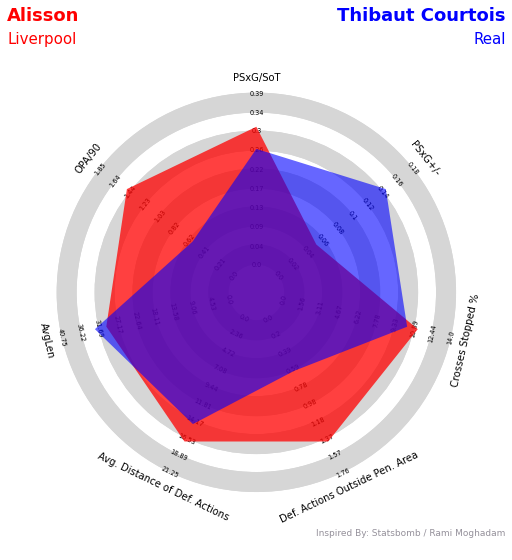

In [15]:
radar = Radar()

fig, ax = radar.plot_radar(ranges = ranges, params = gkparams, values = values,
                          radar_color = ['red', 'blue'],
                          alphas = [.75, .6], title = title, compare = True)

plt.savefig('./players/alisson.png')

In [23]:
ranges, values, title = compareTeams('Liverpool','Real',teampar)

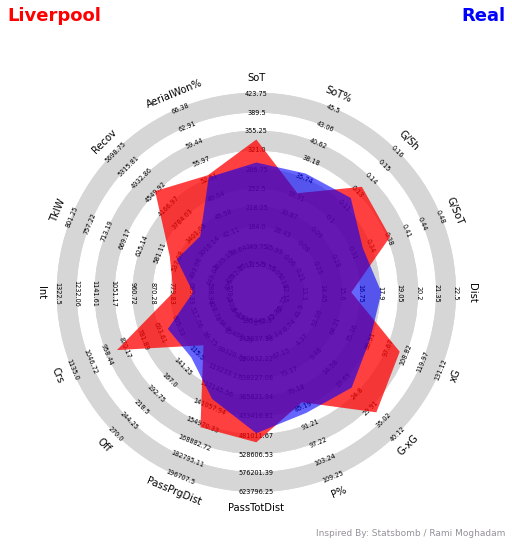

In [18]:
radar = Radar()

fig, ax = radar.plot_radar(ranges = ranges, params = teampar, values = values,
                          radar_color = ['red', 'blue'],
                          alphas = [.75, .6], title = title, compare = True)

plt.savefig('./Teams/LiverpoolVSReal.png')

### Top 5 Goalscorers bar

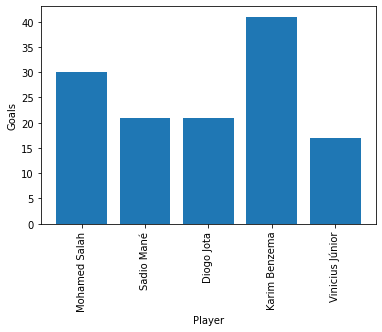

In [20]:
x = players.loc[players['Gls'] > 15][['Player','Gls']].values.tolist()
Player = [i[0] for i in x]

Goals = [i[1] for i in x]

plt.bar(Player,Goals)
plt.xticks(Player, rotation='vertical')
plt.xlabel('Player')
plt.ylabel('Goals')
plt.savefig('./Teams/TopGLS.png')